# [SWCON253] Machine Learning
Teaching Assistant: Yeongwoong Kim (duddnd7575@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P5.A:  GMM을 이용한 밀도추정 (4점)

### 학습목표
- GMM 모델을 이용하여 밀도추정을 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습을 구현할 수 있다.

### 실습내용
Scikit-Learn의 GMM을 이용하여 군집화를 학습해 봅니다.  
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- Imports
- 1) 데이터 생성
- 2) GMM 모델 구현, 학습, Decision Boundary 시각화 **<직접 구현>**

**이번 실습에서 여러분은 `2)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- 모델 작성: 4점, `#<your code>` 한 부분 마다 1점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import LogNorm
%matplotlib inline

## 1) 데이터 생성
랜덤하게 데이터를 생성하며 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화합니다.

In [2]:
# 데이터 생성
X1, y1 = make_blobs(n_samples=1000, centers=((5, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.37, 0.95], [0.73, 0.6]]))
X2, y2 = make_blobs(n_samples=500, centers=1, random_state=42)
X = np.r_[X1, X2]

# 데이터를 훈련 데이터와 테스트 데이터로 분류
# X_test는 P5.B에서 사용
X_train, X_test = train_test_split(X, test_size=0.2)

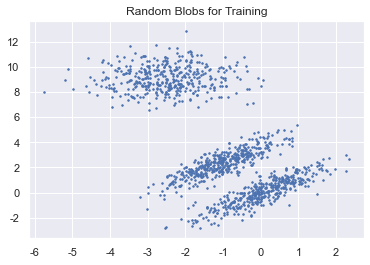

In [3]:
# 훈련 데이터 plot
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=3)
plt.title('Random Blobs for Training')
plt.show() 

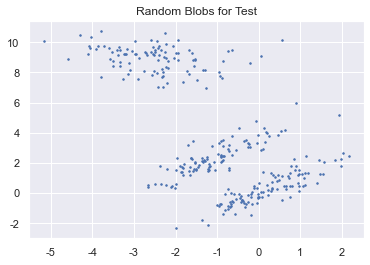

In [4]:
# 테스트 데이터 plot
plt.plot(X_test[:, 0], X_test[:, 1], '.', markersize=3)
plt.title('Random Blobs for Test')
plt.show() 

## 2) GMM 모델 구현, 학습, 시각화

Scikit-Learn의 GaussianMixture 이용하여 GMM을 학습해 봅니다.  
GaussianMixture의 `n_components`를 이용하면 군집의 갯수를 정할 수 있습니다. 이번 실습에서는 3개로 합니다.  
또한 GMM을 생성할 때 n_init을 10으로 설정해주세요

In [5]:
gmm = GaussianMixture(n_components=3, n_init=10).fit(X_train) # <your code> Gaussian Mixture 생성
 # <your code> 훈련 데이터(X_train)를 이용하여 학습
gmm

GaussianMixture(n_components=3, n_init=10)

In [7]:
def plot_gaussian_mixture(clusterer, X, show_centroid=True, show_contour=True, show_boundary=False):    
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    # Centroids 시각화
    if show_centroid:
        centroids = clusterer.means_# <your code> to use the mean of each components to get the centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=20, linewidths=8, color='w', zorder=10)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=20, linewidths=1, color='k', zorder=11) 
    # 밀도 등고선 시각화
    if show_contour:
        Z = - clusterer.score_samples(np.array([x.ravel(), y.ravel()]).T)# <your code> to compute the negative log-likelihood of each sample
        Z = Z.reshape(x.shape)
        cntr = plt.contourf(x, y, Z, norm=LogNorm(vmin=1.0, vmax=40), levels=np.logspace(0, 2, 10), cmap=plt.cm.viridis)
        plt.contour(x, y, Z, norm=LogNorm(vmin=1.0, vmax=40), levels=np.logspace(0, 2, 10), linewidths=1.5, colors='k')
    
    # 결정 경계 시각화
    if show_boundary:
        Z = clusterer.predict(np.array([x.ravel(), y.ravel()]).T)# <your code> to predict the labels
        Z = Z.reshape(x.shape)
        plt.contour(x, y, Z, linewidths=2, colors='r', linestyles='dashed')
    
    plt.xlabel("$f_1$")
    plt.ylabel("$f_2$", rotation=0)

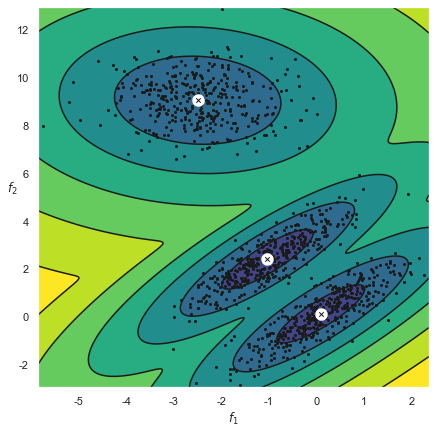

In [101]:
plt.figure(figsize=(7, 7))
plot_gaussian_mixture(gmm, X_train)
plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=4)
plt.show()

# P5.B: 학습한 GMM (P5.A의 결과)를 이용한 새로운 샘플 분류 (2점)
### 학습목표
- 학습한 GMM 모델을 이용하여 새로운 데이터를 분류할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 결정 경계 시각화
- 2) 학습된 GMM을 이용하여 클래스 분류 **<직접 구현>**

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.

### 점수
- 코드 작성: 2점, `#<your code>` 와 plot_gaussian_mixture의 결정 경계 코드를 각각 1점 부여

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## 1) 결정 경계 시각화

훈련 데이터로 학습한 GMM을 바탕으로 결정 경계를 그립니다. 

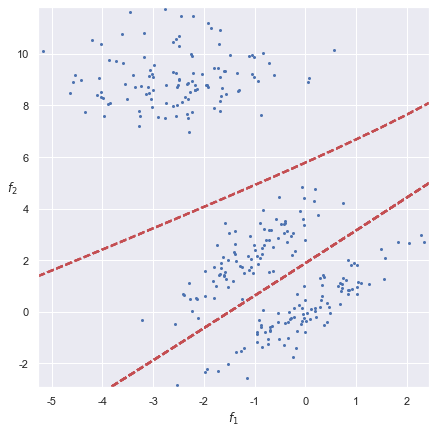

In [102]:
plt.figure(figsize=(7, 7))

# Decision Boundary 시각화
# P5.A에서 학습한 gmm을 그대로 사용
plot_gaussian_mixture(gmm, X_test, show_centroid=False, show_contour=False, show_boundary=True)

# 테스트 데이터 시각화
plt.plot(X_test[:, 0], X_test[:, 1], '.', markersize=4) 
plt.show()

## 2) 학습된 GMM을 이용하여 클래스 분류

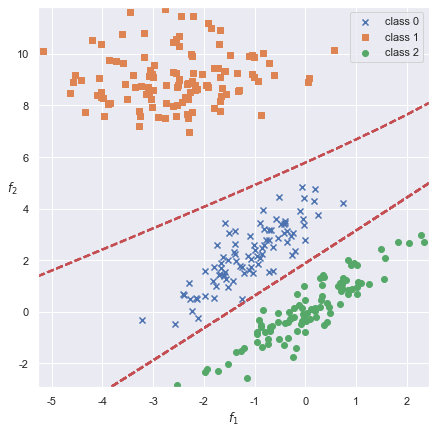

In [103]:
plt.figure(figsize=(7, 7))

# Decision Boundary 시각화
plot_gaussian_mixture(gmm, X_test, show_centroid=False, show_contour=False, show_boundary=True)

y = gmm.predict(X_test)# <your code> to get the prediction

# 테스트 데이터에 대해 Class 분류
plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y[idx] == 0],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y[idx] == 1],
            label='class 1', marker='s')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 2], 
            [i[1] for idx, i in enumerate(X_test) if y[idx] == 2],
            label='class 2', marker='o')
plt.legend()
plt.show()

# P5.C: 학습한 GMM (P5.A의 결과)를 이용한 이상치 탐지 (4점)
### 학습목표
- 학습한 GMM 모델을 이용하여 이상치 탐지를 할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 밀도 임계값 지정 **<직접 구현>**
- 2) 이상치 시각화 

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- 모델 작성: 4점, `#<your code>` 한 부분 마다 2점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

#### Outlier
![Outlier](https://miro.medium.com/max/1400/1*w5HzgB5ekxQ6Nwmx5ggn8Q.jpeg)

GMM을 이상치 탐지에 사용할 수 있습니다. 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있습니다. 예를 들어 결함 제품의 비율이 4%라고 하면 밀도 임곗값을 이 값으로 지정하여 임계 밀도보다 낮은 지역에 있는 샘플을 얻을 수 있습니다.

## 1) 밀도 임계값 지정

학습한 데이터에 대해 밀도 임계값을 구합니다.

In [104]:
densities = gmm.score_samples(X_train) # <your code> to get the densities of the trained data
density_threshold = np.percentile(densities, 4)
anomalies = X_train[densities < density_threshold] # <your code> to get the samples that are under the threshold

## 2) 이상치 시각화

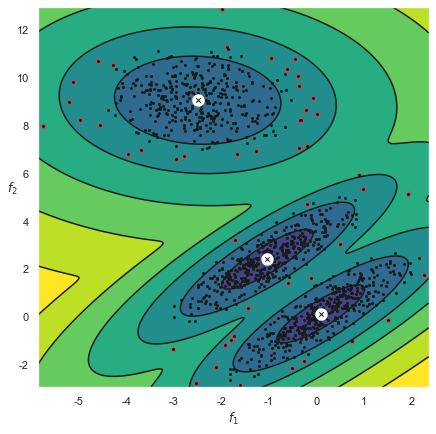

In [105]:
plt.figure(figsize=(7, 7))
plot_gaussian_mixture(gmm, X_train)
plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=4)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()

# Discussion

**1) 모수적 밀도추정과 비모수적 밀도추정을 비교하여 설명하세요.**

[답변작성]

**2) EM 알고리즘을 이용한 GMM 밀도추정 방법에 대해  설명하세요.**

[답변작성]

**3) K-means를 이용한 군집화와 GMM을 이용한 밀도추정 기반의 군집화의 차이에 대해 설명하세요.**

[답변작성]

**4) GMM의 Covariance type를 다른 type ('tied', 'spherical', 'diag')로 바꿀 수 있습니다. 또한, default Covariance type는 'full'로 클러스터의 모양, 크기, 방향에 제약이 없습니다.
그러면 Covariance type를 바꾸면 클러스터가 어떻게 바뀌는지 수행해보고, 이를 설명하세요.**